In [51]:
### Análisis de NetCrime - Esqueleto del Cuaderno (Preprocesamiento + Visualizaciones con Seaborn)

# 1. Import libraries
import pandas as pd
import seaborn as sns # Para visualizaciones
import matplotlib.pyplot as plt

In [52]:
# 1. Cargar dataset
df_base = pd.read_csv('LossFromNetCrime.csv')


# 2. Renombrar columna Country a pais
if 'Country' in df_base.columns:
 df_base.rename(columns={'Country': 'pais'}, inplace=True)


# 3. Normalizar nombres de columnas
df_base.columns = (
df_base.columns
.str.strip()
.str.lower()
.str.replace('-', '_')
)

In [53]:
# 4. Transformar de formato wide a largo
df_melt = df_base.melt(
id_vars=['pais'],
var_name='anio_tipo',
value_name='valor'
)


# 5. Separar 'anio_tipo' en 'anio' y 'tipo_incidente'
df_melt[['anio', 'tipo_incidente']] = (
df_melt['anio_tipo']
.str.split('_', expand=True)
)
# Convertir 'anio' a entero
df_melt['anio'] = df_melt['anio'].astype(int)


# 6. Pivotear para columnas de quejas y perdidas
df_limpios = (
df_melt
.pivot_table(
index=['pais', 'anio'],
columns='tipo_incidente',
values='valor'
)
.reset_index()
)
# Renombrar columnas sin caracteres especiales
df_limpios.rename(columns={
'complaints': 'quejas',
'losses': 'perdidas'
}, inplace=True)

In [54]:
# 7. Ordenar y revisar resultados
df_limpios = df_limpios.sort_values(['pais', 'anio']).reset_index(drop=True)


# Mostrar las primeras filas
df_limpios.head()

tipo_incidente,pais,anio,quejas,perdidas
0,AE,2019,5503.0,48101706.0
1,AE,2020,7390.0,81178182.0
2,AE,2021,10164.0,131934602.0
3,AE,2022,10042.0,187062157.0
4,AE,2023,11034.0,244238485.0


### 🔹 Ranking de Países por Pérdidas (Top 15)

Mostramos los 15 países con mayores pérdidas en el año elegido (`anio_objetivo = 2020`).  
Se usa un gráfico de **barras horizontales**, lo que facilita comparar rápidamente los valores.


C:\Users\jjala\AppData\Local\Temp\ipykernel_3756\2493597005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Top 15 Países por Pérdidas - 2020')

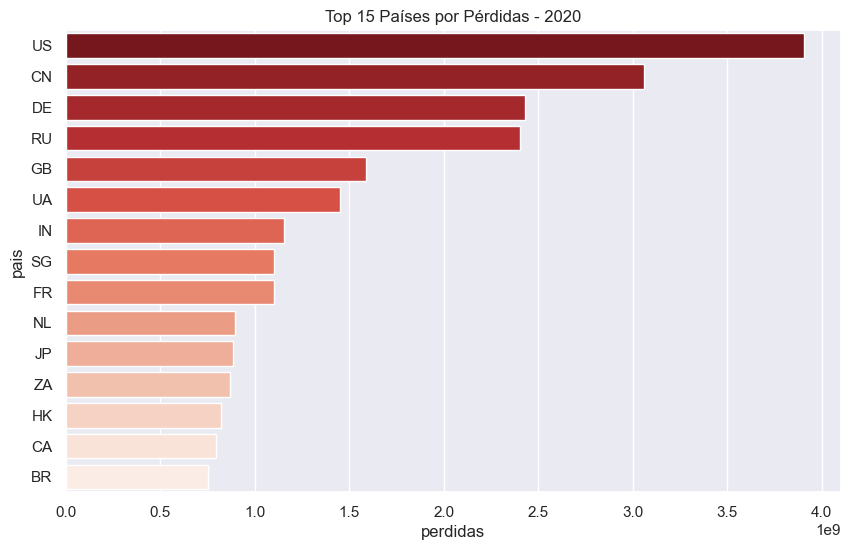

In [55]:
anio_objetivo = 2020
ranking_perdidas = (
    df_limpios[df_limpios['anio']==anio_objetivo]
    .sort_values('perdidas', ascending=False)
    .head(15)
)

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(
    data=ranking_perdidas,
    x='perdidas', y='pais',
    palette='Reds_r', orient='h'
).set_title(f"Top 15 Países por Pérdidas - {anio_objetivo}")

### Relación entre Quejas y Pérdidas (Scatterplot)

Con un gráfico de dispersión se analiza si más quejas implican necesariamente más pérdidas.
Cada punto representa un país en el año elegido. El tamaño de los puntos es proporcional a las pérdidas.

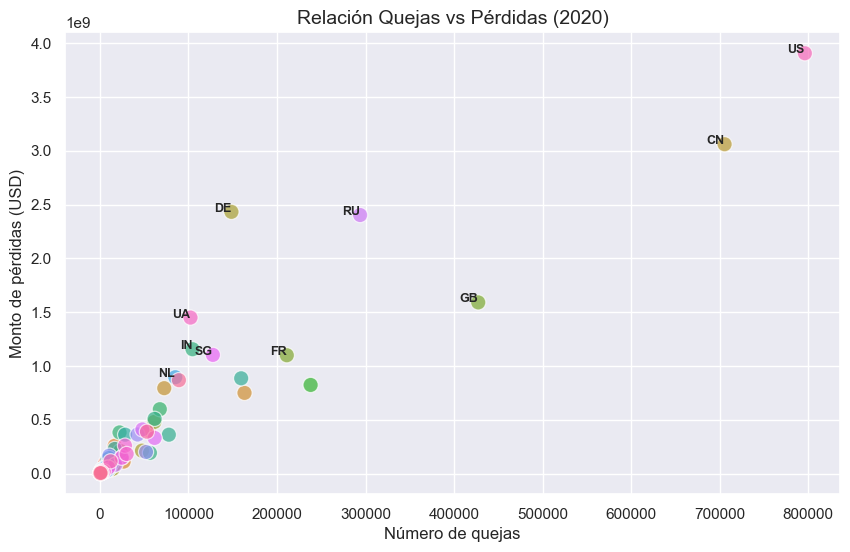

In [56]:


anio_objetivo = 2020
df_anio = df_limpios[df_limpios['anio'] == anio_objetivo]

# Scatterplot con colores por país
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=df_anio,
    x='quejas', y='perdidas',
    hue='pais',   # cada país con color distinto
    s=120, alpha=0.7, legend=False  # quitamos leyenda gigante
)

# Etiquetar solo los 10 países con más pérdidas
top = df_anio.sort_values('perdidas', ascending=False).head(10)
for _, fila in top.iterrows():
    plt.text(
        fila['quejas'], fila['perdidas'], fila['pais'],
        fontsize=9, ha='right', weight='bold'
    )

ax.set_title(f"Relación Quejas vs Pérdidas ({anio_objetivo})", fontsize=14)
ax.set_xlabel("Número de quejas")
ax.set_ylabel("Monto de pérdidas (USD)")
plt.show()


## 📊 Relación Quejas vs. Pérdidas (2020)

El análisis de la dispersión entre el número de **quejas** y el monto de **pérdidas económicas** muestra patrones interesantes:

### 🇺🇸 Estados Unidos (US)
- Se destaca con amplia diferencia: es el país con **mayor número de quejas** y, al mismo tiempo, el de **mayores pérdidas económicas**.  
- El volumen de incidentes y el impacto económico están **altamente correlacionados** en este país.

### 🇨🇳 China (CN), 🇷🇺 Rusia (RU) y 🇩🇪 Alemania (DE)
- Aunque tienen **menos quejas que EE.UU.**, presentan **pérdidas muy altas**.  
- Esto sugiere que los incidentes en estos países son, en promedio, **más costosos**.

### 🇬🇧 Gran Bretaña (GB) y 🇫🇷 Francia (FR)
- Presentan volúmenes **intermedios de quejas**, pero **pérdidas significativas**.  
- Confirman que el costo **no depende solo de la cantidad de incidentes**, sino también de la **gravedad y tipo de ataque**.


### 🌍 Otros países (NL, IN, SG, UA, etc.)
- Aparecen con un nivel **más bajo de quejas y pérdidas**.  
- Reflejan que, aunque los ataques son frecuentes, el **impacto monetario total** no alcanza al de los países líderes.

## 🧩 Conclusión general
- **Más quejas no siempre significan más pérdidas.**  
  - Ejemplo: Rusia y Alemania → menos quejas que otros países, pero pérdidas elevadas.  
- **EE.UU. domina en ambas métricas**, convirtiéndose en el mercado más crítico en términos de ciberdelitos.  
- El impacto económico está **altamente concentrado** en pocos países, mientras que la mayoría mantiene niveles relativamente bajos.
